# Проект 15 создание модели для определения возвраста по фото

In [2]:
import numpy as np
import pandas as pd

from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

labels = pd.read_csv('/datasets/faces/labels.csv')
train_datagen = ImageDataGenerator(rescale=1./255)
train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=12345)
features, target = next(train_gen_flow)


Found 7591 validated image filenames.


(array([0.01982678, 0.01170977, 0.00332664, 0.01343963, 0.01157671,
        0.00904846, 0.0089154 , 0.00585489, 0.00452423, 0.00598795,
        0.00678635, 0.00745167, 0.01051218, 0.0166332 , 0.0170324 ,
        0.02568166, 0.02168969, 0.02568166, 0.02395181, 0.02368568,
        0.01902838, 0.02381874, 0.02834297, 0.02807684, 0.04191567,
        0.03007283, 0.03047202, 0.02887524, 0.02182276, 0.0421818 ,
        0.01716546, 0.02315342, 0.01916145, 0.02075823, 0.01956064,
        0.016234  , 0.01916145, 0.01650014, 0.01423802, 0.02222196,
        0.01304043, 0.01317349, 0.01131058, 0.0127743 , 0.01170977,
        0.00984685, 0.0123751 , 0.00878233, 0.00984685, 0.02075823,
        0.00931459, 0.01011299, 0.00598795, 0.00585489, 0.00678635,
        0.00545569, 0.00492343, 0.00718554, 0.00545569, 0.00997992,
        0.00372584, 0.00372584, 0.00266131, 0.00306051, 0.00479036,
        0.00239518, 0.00239518, 0.00199598, 0.00239518, 0.00665328,
        0.00133066, 0.00172985, 0.00133066, 0.00

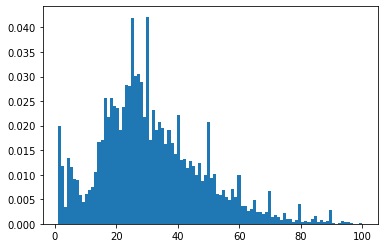

In [3]:
plt.hist(labels['real_age'], density=True, bins=100)

<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='green'>
По графику - видна небольшая бимодальность. Скорее всего, как минимум, замешана ещё одна выборка в данных. Т.е. есть некий признак, который делает гарфик двугорбым). Например школьники здесь и остальные. Т.е. выборка была взята не случайна, а формировалась<br>
Что ещё... пожилых мало.. - это значит плохо обучимся, наверное....<br>
есть младенцы, есть 100 - тут надо посмотерть на эти фото, что там за люди-то такие...<br>
    
В общем, тут можно не стесняться в ... аналитических выражениях)))))))

In [6]:
len(labels) #длина датасета

7591

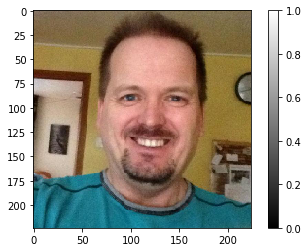

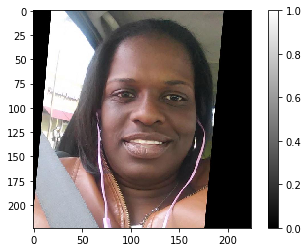

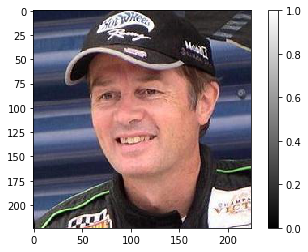

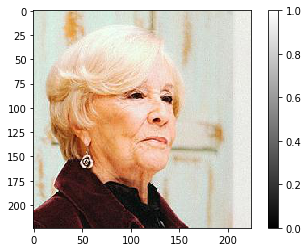

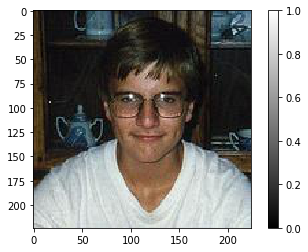

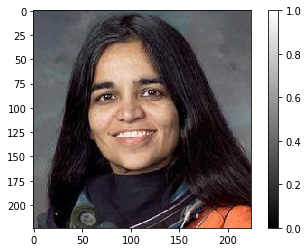

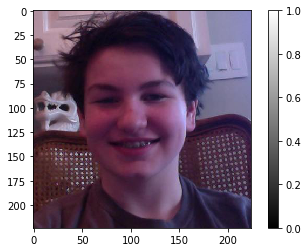

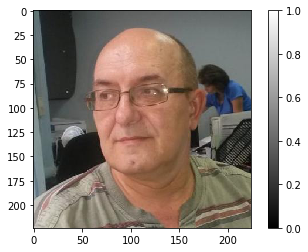

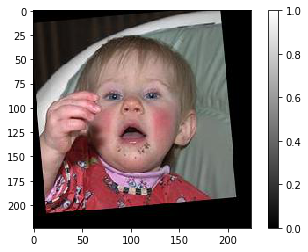

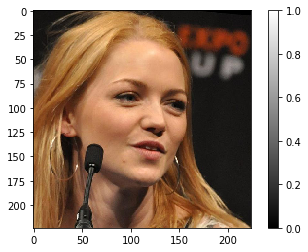

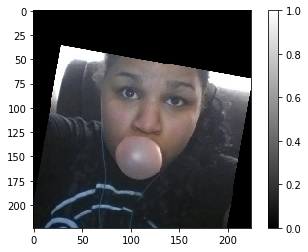

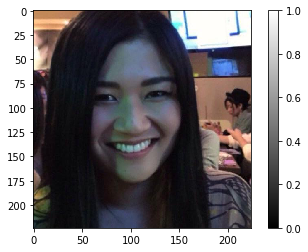

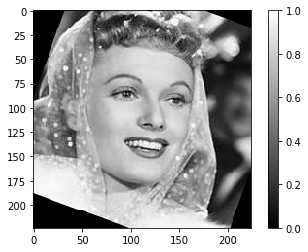

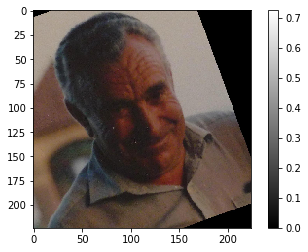

In [4]:
for i in range(14):
    array = np.array(features[i])
    plt.imshow(array, cmap='gray')
    plt.colorbar()
    plt.show()

# 2. Обучение модели

Перенесите сюда код обучения модели и её результат вывода на экран.


(Код в этом разделе запускается в отдельном GPU-тренажёре, поэтому оформлен не как ячейка с кодом, а как код в текстовой ячейке)

```python

#
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, AvgPool2D, AveragePooling2D, GlobalAveragePooling2D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.applications.resnet import ResNet50

def load_train(path):
    lables = pd.read_csv(path + 'labels.csv')
    train_datagen = ImageDataGenerator(rescale=1./255, 
                                       vertical_flip=True, 
                                       horizontal_flip=True, 
                                       #rotation_range=30, 
                                       #width_shift_range=0.2,
                                       #height_shift_range=0.2
                                       validation_split=0.25
                                      )
    train_datagen_flow = train_datagen.flow_from_dataframe(
        dataframe = lables, 
        directory = path + 'final_files/', 
        x_col = 'file_name', 
        y_col = 'real_age',
        target_size = (224,224),
        class_mode = 'raw', 
        batch_size = 32,
        subset = 'training',
        seed = 12345)

    return train_datagen_flow



def load_test(path):
    lables = pd.read_csv(path + 'labels.csv')
    test_datagen = ImageDataGenerator(rescale=1./255, 
                                      validation_split=0.25
                                     )
    test_datagen_flow = test_datagen.flow_from_dataframe(
        dataframe = lables, 
        directory = path + 'final_files/', 
        x_col = 'file_name', 
        y_col = 'real_age', 
        class_mode = 'raw',
        target_size = (224,224),
        batch_size = 32,
        subset = 'validation',
        seed = 12345)

    return test_datagen_flow
    
def create_model(input_shape):
    backbone = ResNet50(input_shape=input_shape,
                        weights='imagenet', 
                        include_top=False)
    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1))
    model.compile(optimizer=Adam(lr=0.0001), loss='mean_squared_error',metrics=['mae'])

    return model

def train_model(model, train_data, test_data, batch_size=None, epochs=5,steps_per_epoch=None, validation_steps=None):
    
    if steps_per_epoch is None:
                 steps_per_epoch = len(train_data)
    if validation_steps is None:
                  validation_steps = len(test_data)
            
    model.fit(train_data,
          validation_data=test_data,
          batch_size=batch_size, epochs=epochs,
          steps_per_epoch=steps_per_epoch,
          validation_steps=validation_steps,
          verbose=2, shuffle=True)
    
    return model

```

```

# 
Train for 178 steps, validate for 60 steps
Epoch 1/5
2020-08-09 14:52:35.060002: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2020-08-09 14:52:38.866513: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
178/178 - 100s - loss: 259.9202 - mae: 11.8600 - val_loss: 742.5809 - val_mae: 22.3217
Epoch 2/5
178/178 - 38s - loss: 100.5763 - mae: 7.6113 - val_loss: 589.6474 - val_mae: 18.9733
Epoch 3/5
178/178 - 38s - loss: 78.1111 - mae: 6.7426 - val_loss: 194.4162 - val_mae: 10.5264
Epoch 4/5
178/178 - 38s - loss: 63.0000 - mae: 5.9931 - val_loss: 199.1179 - val_mae: 11.2540
Epoch 5/5
178/178 - 38s - loss: 56.3825 - mae: 5.7126 - val_loss: 87.8011 - val_mae: 7.0640
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
60/60 - 9s - loss: 87.8011 - mae: 7.0640
Test MAE: 7.0640

```

# 3. Анализ обученной модели

Ошибаться с определением возвраста - может и человек (с определённой погрешностью). ИИ показывает отличные результаты.

Даже такие результаты - завораживают и дают осознание того, что будущее уже наступило, а профессия Data Sciense - выбрана не зря =)